# Classical Random Circuits

Here we use classical circuits to get a handle on error rates.

## setup

In [5]:
import os
import random
from typing import List
import itertools
import networkx as nx
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pyquil.api import get_qc, QuantumComputer
from pyquil.gates import CNOT, CCNOT, X, I, H, CZ, MEASURE, RESET
from pyquil.quilbase import Pragma
from scipy.spatial.distance import hamming

from forest_benchmarking.compilation import basic_compile

from forest_benchmarking.classical_random_circuits import *

## graph state measurement and plotting functions

In [6]:
#qc_perfect = get_qc("Aspen-1-15Q-A", as_qvm=True, noisy=False)
#qc_noisy = get_qc("Aspen-1-15Q-A", as_qvm=True, noisy=True)

qc_perfect = get_qc("9q-square-qvm", as_qvm=True, noisy=False)
qc_noisy = get_qc("9q-square-qvm", as_qvm=True, noisy=True)

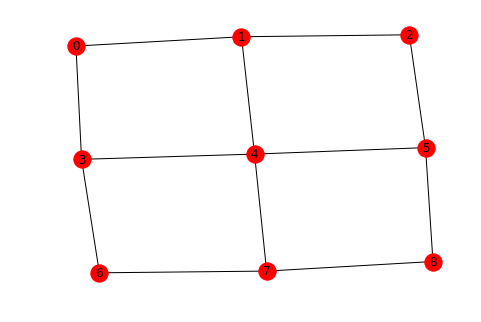

In [7]:
nx.draw(qc_perfect.qubit_topology(),with_labels=True)

In [4]:
from pyquil import *
list_quantum_computers()

['Aspen-3-2Q-A',
 'Aspen-3-3Q-A',
 'Aspen-3-4Q-A',
 'Aspen-3-5Q-A',
 'Aspen-3-6Q-A',
 'Aspen-3-7Q-A',
 'Aspen-3-8Q-A',
 'Aspen-3-9Q-A',
 'Aspen-3-10Q-A',
 'Aspen-3-11Q-A',
 'Aspen-3-12Q-A',
 'Aspen-3-2Q-B',
 'Aspen-3-14Q-A',
 'Aspen-1-2Q-B',
 'Aspen-1-3Q-B',
 'Aspen-1-4Q-B',
 'Aspen-1-5Q-B',
 'Aspen-1-6Q-B',
 'Aspen-1-7Q-B',
 'Aspen-1-9Q-B',
 'Aspen-1-15Q-A',
 'Aspen-1-8Q-B',
 '9q-square-qvm',
 '9q-square-noisy-qvm']

In [8]:
G = qc_perfect.qubit_topology()
len(qc_perfect.qubit_topology())
# distribution of graph lengths
disty = []
for gdx in range(1,len(G.nodes)+1):
    listg = generate_connected_subgraphs(G,gdx)
    disty.append(len(listg))

disty

[9, 12, 22, 36, 49, 48, 32, 9, 1]

In [10]:
G = qc_perfect.qubit_topology()

In [23]:
num_shots_per_circuit = 1
num_rand_subgraphs = 2
num_rand_circuits_per_subgraph = 2
depth = 5
widthy = 3 #max = len(G.nodes)
in_x_basis = False

In [109]:
# check that the nodes are not

data = []
# loop over different graph sizes
for depth_idx,subgraph_size in itertools.product(range(1,depth+1), range(1,widthy+1)):
    list_of_graphs = generate_connected_subgraphs(G, subgraph_size)
    wt = []
    for kdx in range(1, num_rand_subgraphs+1):
        # randomly choose a lattice from list
        lattice = random.choice(list_of_graphs)
        for jdx in range(1, num_rand_circuits_per_subgraph+1):
            prog = generate_random_classial_circuit_with_depth(lattice, depth_idx, in_x_basis)
            # perfect 
            perfect_bitstring = qc_perfect.run_and_measure(prog, trials=1)
            perfect_bitstring_array = np.vstack(perfect_bitstring[q] for q in prog.get_qubits()).T
            # run on hardware or noisy QVM
            actual_bitstring = qc_noisy.run_and_measure(prog, trials=3)
            actual_bitstring_array = np.vstack(actual_bitstring[q] for q in prog.get_qubits()).T
            wt.append(get_error_hamming_distance_from_results(perfect_bitstring_array, actual_bitstring_array))

    # for each graph size flatten the results        
    wt_flat = [item for sublist in wt for item in sublist]
    hamming_wt_distr = get_error_hamming_distributions_from_list(wt_flat, subgraph_size)
    # list of dicts. The keys are (depth, width, hamming_dist)
    data.append({'depth': depth_idx, 'width': subgraph_size, 'hamming_dist': hamming_wt_distr})

In [110]:
df = pd.DataFrame(data)

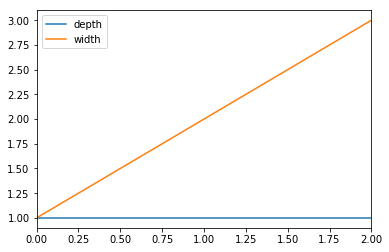

In [117]:
idx = df.depth==1
ka = df[idx]


In [26]:
len(data)
Pcheck = np.ndarray(shape=(depth,widthy), dtype=float, order='C')

for dslice in data:
    depth_idx = dslice[0]-1
    width_idx = dslice[1]-1
    Pcheck[depth_idx,width_idx]= dslice[2][0]

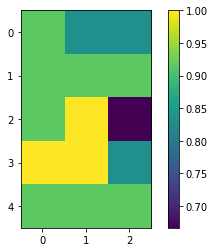

In [40]:
plt.imshow(Pcheck, interpolation='none', cmap='viridis')
plt.colorbar(orientation='vertical')
plt.show()

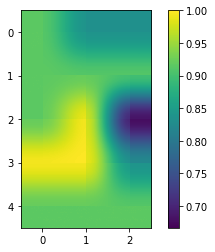

In [41]:
plt.imshow(Pcheck, interpolation='hamming', cmap='viridis')
plt.colorbar(orientation='vertical')
plt.show()

In [42]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [43]:
depthvec = np.arange(1,depth+1,1)
widthvec = np.arange(1,widthy+1,1)

In [44]:
X, Y = np.meshgrid(widthvec, depthvec)

Text(0.5,1,'Simplest default with labels')

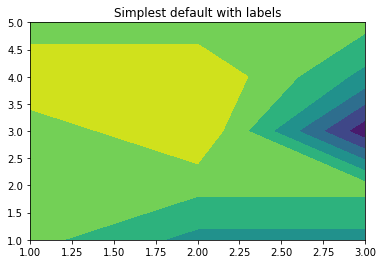

In [45]:
fig, ax = plt.subplots()
CS = ax.contourf(X, Y, Pcheck)
#ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Simplest default with labels')

In [ ]:
## Probablity decay vectors

In [ ]:
def decay_fun_width(data,depthy,widthy,depth):
    decay = np.zeros(widthy)
    for wdx in range(0,widthy):
        dslice = data[depth-1+wdx]
        decay[wdx] = dsliced
    = np.array(shape=(depth,widthy), dtype=float, order='C')

for dslice in data:
    depth_idx = dslice[0]-1
    width_idx = dslice[1]-1
    Pcheck[depth_idx,width_idx]= dslice[2][0]

In [54]:
list(range(0,widthy))

[0, 1, 2]

In [50]:
widthy

3

In [55]:
import pandas as pd

In [58]:
tuples = [(1, u'red'), (1, u'blue'), (2, u'red'), (2, u'blue')]
pd.MultiIndex.from_tuples(tuples, names=('number', 'color'))


MultiIndex(levels=[[1, 2], ['blue', 'red']],
           labels=[[0, 0, 1, 1], [1, 0, 1, 0]],
           names=['number', 'color'])

In [80]:
md_df = pd.MultiIndex.from_tuples(data,names=('depth','width','hamming dist'))
md_df

MultiIndex(levels=[[1, 2, 3, 4, 5], [1, 2, 3], [(0.6666666666666666, 0.25, 0.08333333333333333, 0.0), (0.75, 0.0), (0.75, 0.25, 0.0), (0.8333333333333334, 0.16666666666666666, 0.0), (0.8333333333333334, 0.16666666666666666, 0.0, 0.0), (0.9166666666666666, 0.08333333333333333, 0.0), (0.9166666666666666, 0.08333333333333333, 0.0, 0.0), (1.0, 0.0)]],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4], [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2], [7, 5, 4, 1, 3, 4, 7, 2, 0, 7, 2, 6, 7, 3, 6]],
           names=['depth', 'width', 'hamming dist'])

In [69]:
data

[(1, 1, (1.0, 0.0)),
 (1, 2, (0.9166666666666666, 0.08333333333333333, 0.0)),
 (1, 3, (0.8333333333333334, 0.16666666666666666, 0.0, 0.0)),
 (2, 1, (0.75, 0.0)),
 (2, 2, (0.8333333333333334, 0.16666666666666666, 0.0)),
 (2, 3, (0.8333333333333334, 0.16666666666666666, 0.0, 0.0)),
 (3, 1, (1.0, 0.0)),
 (3, 2, (0.75, 0.25, 0.0)),
 (3, 3, (0.6666666666666666, 0.25, 0.08333333333333333, 0.0)),
 (4, 1, (1.0, 0.0)),
 (4, 2, (0.75, 0.25, 0.0)),
 (4, 3, (0.9166666666666666, 0.08333333333333333, 0.0, 0.0)),
 (5, 1, (1.0, 0.0)),
 (5, 2, (0.8333333333333334, 0.16666666666666666, 0.0)),
 (5, 3, (0.9166666666666666, 0.08333333333333333, 0.0, 0.0))]

In [91]:
md_df.levels[1]

Int64Index([1, 2, 3], dtype='int64', name='width')

In [76]:
idx = md_df[md_df.name == 'depth']

In [77]:
md_df[idx]

IndexError: too many indices for array

In [98]:
df = pd.DataFrame(
{"depth" : [4 ,5, 6],
"width" : [7, 8, 9],
"hamming dist" : [10, 11, 12]},
)

In [107]:
asdf = [{'depth':1,'width':3,'hamming_dist':[0.9,0.1,0.0]},{'depth':4,'width':1}]

In [108]:
pd.DataFrame(asdf)

,depth,hamming_dist,width
0,1,"[0.9, 0.1, 0.0]",3
1,4,NaN,1


In [101]:
L = ['Thanks You', 'Its fine no problem', 'Are you sure']

#create new df 
df = pd.DataFrame({'row':L})
print (df)

                   row
0           Thanks You
1  Its fine no problem
2         Are you sure
